#  <font color=darkmagenta><u>A Brief Introduction To The 10 Simplest Machine Learning Algorithms</u></font>

## <font color=teal><u>Principal Component Analysis</u></font>

### <font color=brown><u> *Introduction*</u></font>

We have all come across situations when the dataset we're dealing with has way too many features to implement any machine learning algorithm on. Here is where Dimensionality Reduction comes to the rescue. In simple terms, dimensionality reduction works on the belief that if you have fewer relationships to consider between variables, you are less likely to overfit (when a function is too closely fit to a limited set of data points).
The two commonest ways of dimensionality reduction are feature elimination, where we simply remove the irrelevent features (and also compromise on vakuable information) and feature exttraction, where we create new independent variables, and each new independent variable is a combination of each of the old independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.
Principal component analysis is a very popular technique for feature extraction as it combines our input variables in a specific way, thereby enabling us to drop the “least important” variables while still retaining the most valuable parts of all of the variables. Additionally, each of the new variables after PCA are all independent of one another.

### <font color=brown><u>*Basic Working of PCA*</font>

 - First, we calculate a matrix which exlains how our variables relate to one another (the covariance matrix of data points).
 - We can then understand the “directions” of our data and how “important” each direction is (the eigenvalues and eigenvectors for the matrix).
 - Now, we transform our original data to align with these important directions (sorting of the eigen vectors according to their eigen values in decreasing order and choosing first k eigen vectors which will be the new k dimensions. Afterwards, we transform the original n dimensional data points into k dimensions).

We are used to visualizing things in three diensions, but the versatility of PCA can be truly understood when we consider a dataset which is highly multidimensional (more than 3D). The visualization of such a dataset will not produce any significant inference since it is extremely cumbersome to define the dependence of our target on all these features simultaneously. But, by applying PCA, we can reduce our dataset to two dimensions which makes formation of inferences very easy while still retaining the inherent patterns present among the original features.
The actual mathematics working under the hood requires significant knowledge of Linear Algebra but the above working should provide a good starting point for the layman.
#### <font color=green> For people who want a more in-depth understandig of PCA, please check out the following resources which I've found quite helpful and still regularly refer to-</font>

 - Python Documentation for PCA within the sklearn library.
 - PCA Explanation on AnalyticsVidhya.

### <font color=brown><u>*Example Time*</font>

Since this is a very introductory article, let's look at a very basic example




### <font color=black >We'll be looking at a very popular dataset, the Iris Dataset which contains petal and sepal dmensions of the various species of the Iris flower and try to see whether we can apply our newly acquired knowledge of PCA on it!</font>



####  <font color=DarkTurquoise ><u>Loading the Dataset </font>

In [57]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_len    150 non-null float64
sepal_wid    150 non-null float64
petal_len    150 non-null float64
petal_wid    150 non-null float64
class        150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


####  <font color=DarkTurquoise ><u>Split data table into predictor variable X and target variable y</font>

In [59]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

####  <font color=DarkTurquoise><u>Visualization </font>

####  <font color=darkblue>Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each predictor row X can be pictured as a 4-dimensional column vector containing sepal length, sepal width, petal length and petal width.</font>

####  <font color=darkblue>Let us visualize the dataset using histograms</font>
#### <font color=black> We'll start with sepal length, then sepal width, then petal length and finally petal width</font>

Text(0, 0.5, 'Count')

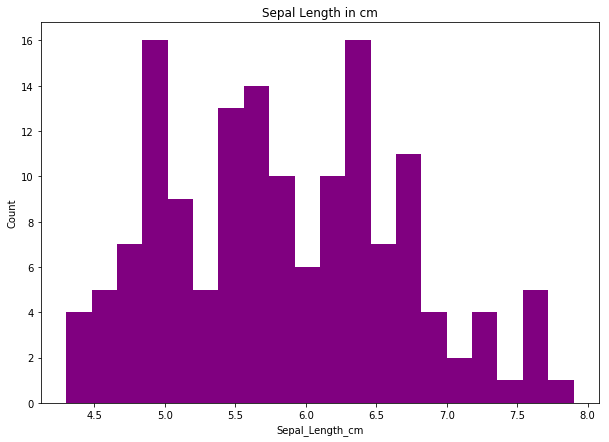

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.figure(figsize = (10, 7)) 
x = df["sepal_len"] 
plt.hist(x, bins = 20, color = "purple") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 



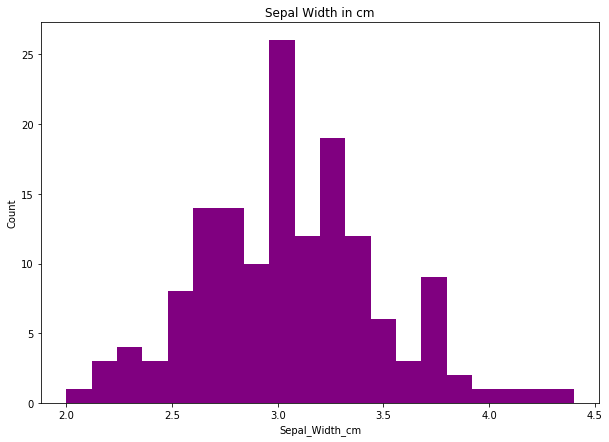

In [61]:
plt.figure(figsize = (10, 7)) 
x = df.sepal_wid 

plt.hist(x, bins = 20, color = "purple") 
plt.title("Sepal Width in cm") 
plt.xlabel("Sepal_Width_cm") 
plt.ylabel("Count") 

plt.show() 


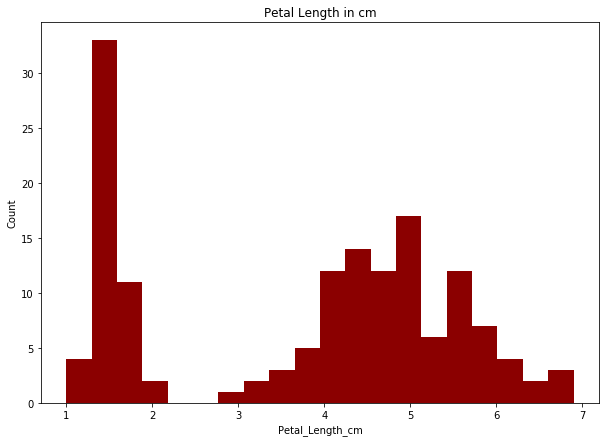

In [62]:
plt.figure(figsize = (10, 7)) 
x = df.petal_len 

plt.hist(x, bins = 20, color = "darkred") 
plt.title("Petal Length in cm") 
plt.xlabel("Petal_Length_cm") 
plt.ylabel("Count") 

plt.show() 


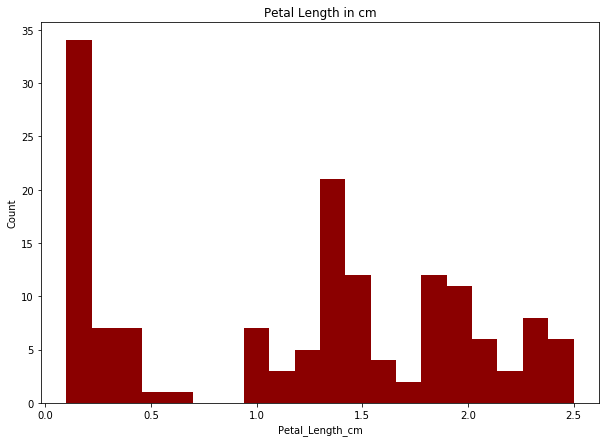

In [63]:
plt.figure(figsize = (10, 7)) 
x = df.petal_wid

plt.hist(x, bins = 20, color = "darkred") 
plt.title("Petal Length in cm") 
plt.xlabel("Petal_Length_cm") 
plt.ylabel("Count") 

plt.show() 


####  <font color=DarkTurquoise ><u>Standardizing</font>

In [64]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


####  <font color=DarkTurquoise ><u>Implementation of PCA in scikit-learn</font>

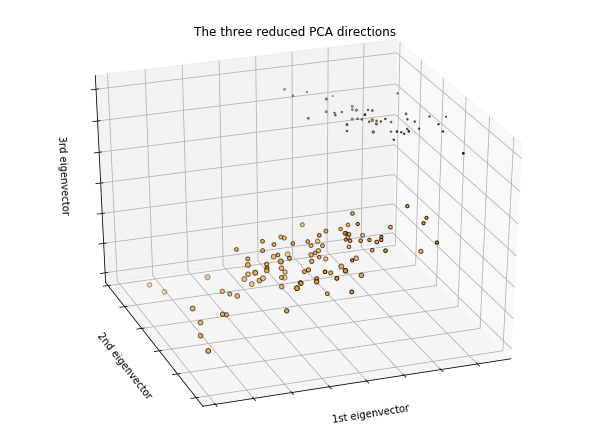

In [76]:
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='DarkOrange', cmap=plt.cm.Set1, edgecolor='black', s = X[:, 3]*10)
ax.set_title("The three reduced PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


plt.show()

## <font color=teal><u>Linear Regression</u></font>

### <font color=brown><u> *Introduction*</u></font>

Though neural networks and deep learning have become the dominent architectures in the world of machine learning, linear regression remains as an essential component of predictive analytics. In very simple terms, linear regression tries to fit a line to the data points in our dataset. This line will try to minimize the error between the observed point and the predicted point. In essence, this technique is basically aimed at minimizing the errors of prediction, which is why it is often referred to as Ordinary Least Squared Regression.

### <font color=brown><u> *Basic Working of Linear Regression*</u></font>

Since our main aim is to get a grasp on the intuition behind the algorithms rather than delving into the rigorous mathematics involved, we shall look into the working of this algorithm from a layman's point of view as well and assume no prior knowledge of Linear Algebra and Multivriate Calculus.
We assume that the output varies linearly with the input (basically, we can plot the output and input as a line of the form y = mx + c. What we want to do is to find out the value of the slope and the intercept (to be more specific, the weight and the constant). If we are able to figure out the values of the slope and the intercept, then we can predict the value of the output for any new input.
For any real data, even if very simple, a linear pattern is almost never present and the best we can do is to approximate a line which best fits the maximum number of data points. For example, let's take a look at the following graph
<img src="https://discourse-cdn-sjc2.com/standard17/uploads/plot/7010c8f01d28dfad154c0e2b73544aee5276b675" alt="LR Graph">


It's impossible to draw one single line which passes through all the data points here, implying that it's impossible to find the perfect value for the constant and weight. This means our output will be approximate. There might be slight deviation from actual value. But it works fine for most tasks. In order to find the line of best fit for the dots in the graph, we need figure out a line whose distances from each dot in the graph is optimal/minimal. Our objective is to draw that line in the graph above.
So, we draw a random line on the graph for some random value of constant and weight. Lets say we keep constant and weight both 1 (c=1, m=1) and draw the line on the graph for each x. Based upon values of x, this line might end up in one of the following positions

 - On leftish side of the dots towards y axis. More vertical.
 - On rightish side of dots towards x axis. More horizontal.
 - Somewhere between dots but still not best fit line.

Now, we need to find out whether the line we've obtained is the best fit line or not and move this line iteratively and slowly towards the place where it best fits the sample data (dots in the graph).
We will use a combination of gradient descent (an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent) with least square method (minimizing the sum of the squares of the difference between the expected and predicted outputs) to achive these objectives.

### <font color=brown><u>*Example Time!*</font>

As we did for PCA, let's look at a very basic example
### Let's go back to the Iris dataset we worked on in the PCA section and try to apply Linear Regression to predict the best fit line between two arbitrary attributes!


####  <font color=DarkTurquoise ><u>Importing the libraries and loading the dataset </font>

In [40]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

####  <font color=DarkTurquoise ><u>Summarizing the dataset </font>

In [41]:
# shape
print(dataset.shape)

(150, 5)


In [42]:
# first 20 columns
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [43]:
# statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [44]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


####  <font color=DarkTurquoise><u>Visualization </font>

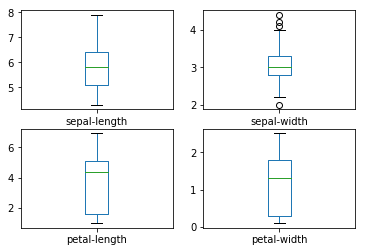

In [45]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

This gives us a much clearer idea of the distribution of the input attributes

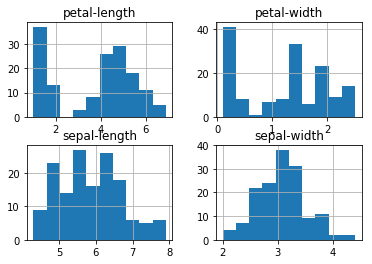

In [46]:
# histograms
dataset.hist()
plt.show()

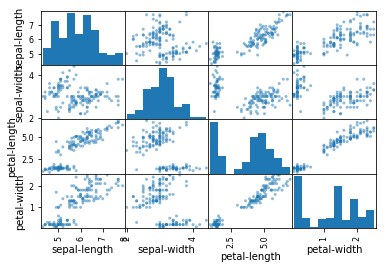

In [47]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

 This is helpful in obtaining structured relationships between input variables.

#### <font color=DarkTurquoise >Now that we're done with visualization and splitting of the dataset, let’s build and evaluate our model.

In [50]:
fit_data = dataset[["petal-length", "petal-width"]].values
x_data = fit_data[:,0].reshape(-1,1)
y_data = fit_data[:,1].reshape(-1,1)

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()
# once the data is reshaped, running the fit is simple
regr.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

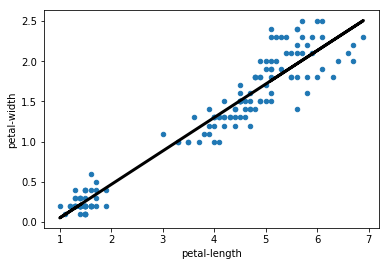

In [53]:
 # we can then plot the data and out fit
axes = dataset.plot(x="petal-length", y="petal-width", kind="scatter")
plt.plot(x_data, regr.predict(x_data), color='black', linewidth=3)
plt.show()

## <font color=teal><u>Logistic Regression</u></font>

### <font color=brown><u> *Introduction*</u></font>

Logistic Regression is a classification algorithm that is used to predict the probability of a categorical (capable of taking multiple values) dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (true) or 0 (false). In other words, the logistic regression model predicts the probability that the output will be 1 as a function of the inputs. Here, the output 1 is taken as the desired outcome. This approach requires a quite large data sample and it needs to be ensured that the independent variables are independent of each other.

### <font color=brown><u> *Basic Working of Logistic Regression*</u></font>
Logistic Regression possesses several advantages over Linear Regression. Linear Regression can't be used for classification tasks whereas since Logistic Regression gives the output between 0 and 1, it is highly suitable for classification tasks. This can be better understood by looking at the following illustration

<img src="https://cdn-images-1.medium.com/max/800/1*8q9ztX9dGVCv7e0DmH_IVA.png" alt="LR Graph">

Here, the last block in the Logistic Regression illustration is known as the activation function. The activation function used here is known as the sigmoid activation function. It's graph looks like this

<img src="https://cdn-images-1.medium.com/max/800/1*yKvimZ3MCAX-rwMX2n87nw.png" alt="LR Graph">

We can see that the value of the sigmoid function always lies between 0 and 1. If the output is greater than 0.5, we classify it as Class-1 (Y=1) or else as Class-0 (Y=0).  It uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, and thus relies on large-sample approximations. 
Extending the information we have obtained, it is quite simple to move to Multinomial Logistic Regression where the output variable can have more than two possible discrete outputs. Consider the Digit Dataset (can be imported from the sklearn library). Here, the output variable is the digit value which we will try to predict in our example code.

### <font color=brown><u>*Example Time!*</font>

Let's try and apply our knowledge of Logistic Regression on a very basic example

####  <font color=DarkTurquoise ><u>Importing the libraries and loading the dataset </font>

In [54]:
from sklearn import datasets, linear_model, metrics 
   
# load the digit dataset 
digits = datasets.load_digits() 
   
# defining feature matrix(X) and response vector(y) 
X = digits.data 
y = digits.target 

####  <font color=DarkTurquoise >Split data table into predictor variable X and target variable y</font>

In [55]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 

####  <font color=DarkTurquoise >Create logistic regression object</font>

In [56]:
reg = linear_model.LogisticRegression() 

####  <font color=DarkTurquoise >Training the model using the training sets and making predictions on the testing set after that </font>

In [57]:
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

/home/shashank/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/shashank/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



####  <font color=DarkTurquoise >Comparing actual response values (y_test) with predicted response values (y_pred)

In [58]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 95.6884561891516


## <font color=teal><u>Naive Bayes Algorithm</u></font>

### <font color=brown><u> *Introduction*</u></font>

Classification and Prediction is one the most important aspects of Machine Learning and Naive Bayes is a simple but surprisingly powerful algorithm for predictive modeling. The Naive Bayes algorithm is one of the most widely used approaches for modelling a predictive problem probabilistically. It simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is quite a big assumption but results in a fast and effective method which is of foremost importance in any machine learning problem.<br>
The Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that a particular fruit is an apple or an orange or a banana and that is why it is known as “Naive”.<br>
It is not only a simple approach but also a fast and accurate method for prediction with a relatively low computation cost. It performs well in the case of text analytics problems and when the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.




### <font color=brown><u> *Basic Working of Naive Bayes Algorithm*</u></font>

 The Formula For Bayes' Theorem is as follows

\begin{aligned} &P\left(A|B\right)=\frac{P\left(A\bigcap{B}\right)}{P\left(B\right)}=\frac{P\left(A\right)\cdot{P\left(B|A\right)}}{P\left(B\right)}\\ &\textbf{where:}\\ &P\left(A\right)\text{ is the probability of A occurring;}\\ &P\left(B\right)\text{ is the probability of B occurring;}\\ &P\left(A|B\right)\text{ is the probability of A given B;}\\ &P\left(B|A\right)\text{ is the probability of B given A; and}\\ &P\left(A\bigcap{B}\right))\text{ is the probability of both A and B occurring.}\\ \end{aligned}

Naive Bayes predicts membership probabilities for each class. The class with the highest probability is considered as the most likely class. This is also known as Maximum A Posteriori (MAP).<br>
This concept has a very wide range of applications and can be implemented as a first basic approach in almost any classification problem conceivable from spam filtering to loan predictions. 

### <font color=brown><u>*Example Time!*</font>

Let's try and apply our knowledge of Naive Bayes on a very basic example
### We'll be working on a very famous dataset, the UC Irvine Wine dataset to implent Naive Bayes. The dataset consists of 13 features and we'll be building a model to classify the type of wine from 3 different types (multiclass classification). So without further ado, let's get right to it!


####  <font color=DarkTurquoise ><u>Importing the libraries and loading the dataset </font>

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()


####  <font color=DarkTurquoise ><u>Exploring the data </font>

In [4]:
# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)


Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [6]:
# print the wine data features (top 5 records)
print (wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [7]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print (wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


####  <font color=DarkTurquoise ><u>Splitting the data </font>

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

####  <font color=DarkTurquoise ><u>Model Generation</font>

In [10]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

####  <font color=DarkTurquoise ><u>Model Evaluation</font>

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


## <font color=teal><u>K-means Clustering</u></font>

### <font color=brown><u> *Introduction*</u></font>

K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms. Unsupervised learning refers to the process of drawing inferences from data without any target variable to map onto. This simple algorithm can be implemented on unlabelled datasets to gain intuition about the number of separate classes the data points can be divided into. K-means continues to be the backbone of unsupervised learning tasks and finds use in class segmentation, image compression etc to name a few. 

### <font color=brown><u> *Basic Working of K-means Clustering*</u></font>
The objective of K-means is quite simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares (the Euclidean distance of each data point from the centroid of the nearest cluster).<br>
To process the learning data, the K-means algorithm starts with an initial group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative calculations to optimize the positions of the centroids. It halts the iteration process only when either the required number of iterations has been achieved or when the centroid have stabilized.<br>
Contrary to supervised learning where we have labelled target variables to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric due to the absence of a target class that we can use to evaluate the outcome of different clustering algorithms. Moreover, since k-means requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes knowledge related to our field of analysis and basic intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.<br>
One of the simplest evaluation methodologies is the Elbow method. It gives us a fair approximation of what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

<img src="https://qph.fs.quoracdn.net/main-qimg-678795190794dd4c071366c06bf32115-c" alt="LR Graph">

As can be clearly observed in the above graph, the optimum number of clusters is 6 since there is a distinct "elbow" formation there which renders further clusters unsuitable due to extensive flattening out of the SSE.

### <font color=brown><u>*Example Time!*</font>

Enough with the talk, let's see what K-means looks like on a real dataset.

### We'll be working on another extremely popular and simple dataset, the MNIST Handwritten Digits dataset to implent K-means Clustering and see how many different digits can the model discern from the dataset.

The code has been taken from the official scikit-learn documentation to demonstrate how essential k-means is and more importantly, how beutifully two simple approaches we've covered can be combined to produce stunning results.

In [12]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


/home/shashank/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	0.40s	69432	0.602	0.650	0.625	0.465	0.598	0.146


/home/shashank/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/shashank/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


random   	0.21s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.04s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


<Figure size 640x480 with 1 Axes>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png" alt="LR Graph">

## <font color=teal><u>K-Nearest Neighbors</u></font>

### <font color=brown><u> *Introduction*</u></font>

Since we're familiar with the basics of K-Means Clustering, it's time to move on to bigger and better things. There is a very interesting, sophisticated yet quite simplistic model known as KNN which stems directly from k-means clustering. It is a supervised learning algorithm which can successfully classify a data point into a set of pre-existing classes. The algorithm is simple and easy to implement and there’s no need to build a model, tune several parameters, or make additional assumptions. It is very versatile and can be used for classification, regression, as well as search. It's practical applications continue to grow with each passing day and span a wide range of domains from heart disease classification to detection of patterns in credit card usage by customers in the retail sector.<br>

### <font color=brown><u> *Basic Working of K-Nearest Neighbors*</u></font>
Put simply, it is based on the age old proverb, "Birds of feather flock together".<br>
We already know from k-means that similar data points are close to each other. The KNN algorithm hinges on this assumption being true and calculates the distances between the new data point and the centroids of each cluster in order to ascertain which class is our data point closest to.<br>
Note here that there are quite a few ways of calculating distances between two points but for introductory purposes, we will be working with Euclidean distance only.<br>
Now as much as we are trying to refrain from getting into technicalities and jargons, it's inevitable that we'll run into some roadblocks every now and then. So, let's take a brief look at the algorithm of KNN so that we can summarize the steps in points<br>
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data

    a. Calculate the distance between the query example and the current example from the data.<br>
    b. Add the distance and the index of the example to an ordered collection
    

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels

### <font color=brown><u>*Example Time!*</font>

Time to put our knowledge to the test and apply this model on a dataset

### We'll be working on the Iris flower dataset and try to create some interesting visualizations.

####  <font color=DarkTurquoise >Importing the libraries and loading the dataset </font>

In [21]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pandas.read_csv(url, names=names)

####  <font color=DarkTurquoise >Summarizing the dataset</font>

In [22]:
# Gathering information about the various attributes of our dataset
print("The shape of the dataset is",dataset.shape)

The shape of the dataset is (150, 5)


In [23]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [29]:
feature_columns = ['sepal-length', 'sepal-width', 'petal-length','petal-width']
X = dataset[feature_columns].values
y = dataset['species'].values

####  <font color=DarkTurquoise >Encoding the dataset so that our analysis becomes easier</font>

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

####  <font color=DarkTurquoise >Splitting the dataset into training and testing</font>

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

####  <font color=DarkTurquoise >Visualizing our data</font>

<Figure size 432x288 with 0 Axes>

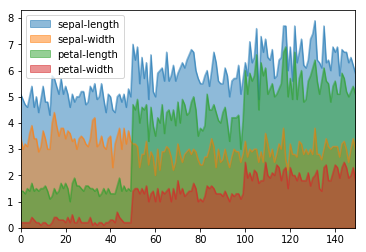

In [47]:
from pandas.plotting import parallel_coordinates
plt.figure()
dataset.plot.area(stacked=False)

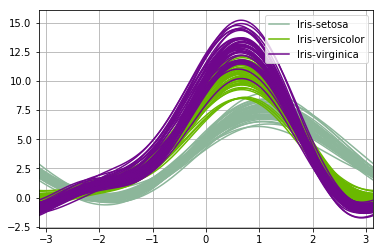

In [54]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(dataset, 'species')

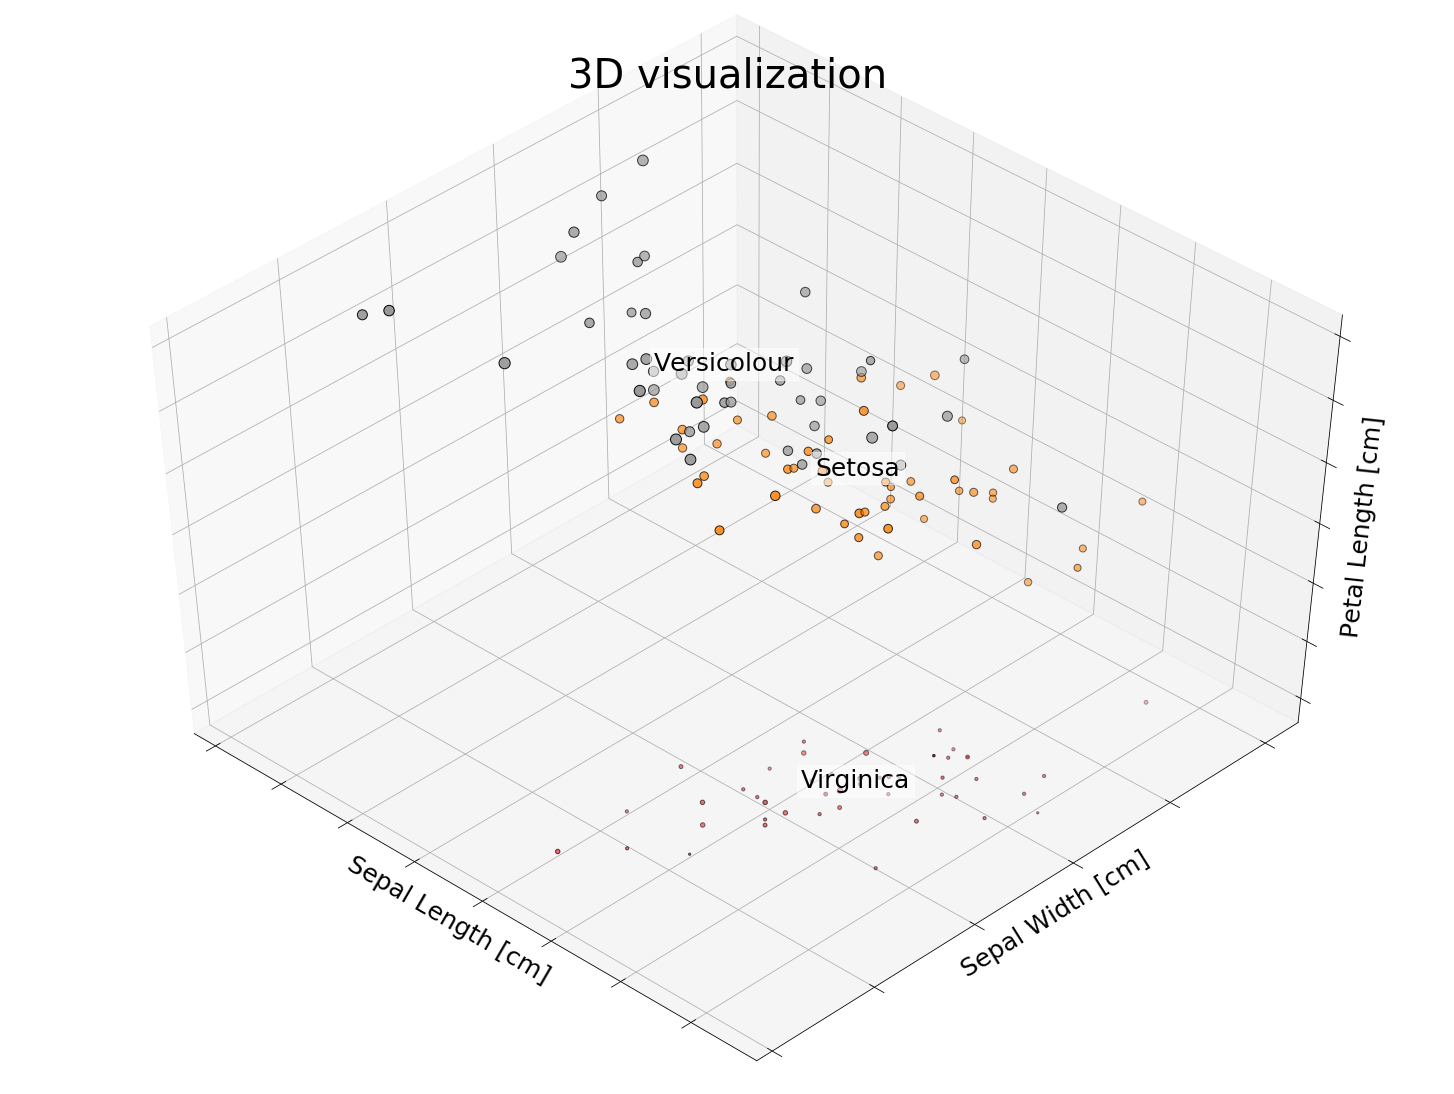

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

####  <font color=DarkTurquoise >Using KNN for Classification</font>

In [77]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

####  <font color=DarkTurquoise >Now we shall evaluate our prediction</font>

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [80]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


####  <font color=DarkTurquoise >We will now use cross-validation for parameter tuning</font>

<Figure size 432x288 with 0 Axes>

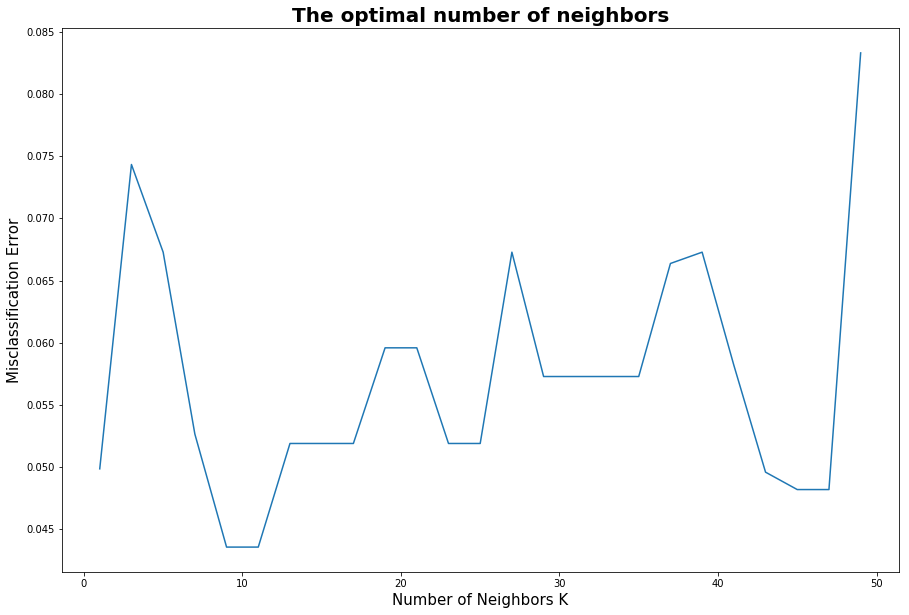

In [83]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)

plt.plot(k_list, MSE)

plt.show()

####  <font color=DarkTurquoise >Finding best k</font>

In [84]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
